In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('./data_daib.xlsx')

In [3]:
data

,Country,Gender,Age,Marital_Status,Work,Hypertension,Dyslipidemia,DM,Year_DM_Diagnosed,DM_Duration,...,Fasting_Blood_Glucose_Value_SI_Units,HbA1C_Admission_Value,Cholesterol_Value_SI_Units,Triglycerides_Value_SI_Units,LDL_Value_SI_Units,HDL_Value_SI_Units,Creatinine_Clearance,Heart_Rate,Systolic_BP,Diastolic_BP
0,Bahrain,Female,73,Married,No,Yes,Yes,No,0,0,...,7.000000,5.952881,5.38,1.85,3.250000,1.180000,24.12,75.0,150.0,70.0
1,Oman,Female,64,Widowed,No,Yes,Yes,Yes,2002,10,...,11.930000,9.094407,5.40,2.24,2.900000,1.500000,63.60,117.0,140.0,100.0
2,Bahrain,Female,56,Married,No,No,Yes,Yes,1988,24,...,4.400000,7.100000,4.70,1.30,2.950000,1.150000,114.24,82.0,165.0,84.0
3,Kuwait,Female,78,Widowed,No,Yes,No,No,0,0,...,6.200000,5.600000,4.11,1.11,2.380000,1.230000,27.55,90.0,200.0,103.0
4,Oman,Male,54,Married,No,Yes,No,No,0,0,...,4.000000,5.600000,5.20,2.20,3.500000,0.920000,92.37,75.0,118.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,Oman,Male,75,Married,No,Yes,Yes,Yes,2001,11,...,7.500000,8.800000,4.67,2.22,2.940000,0.710000,45.28,98.0,130.0,80.0
3368,Oman,Male,56,Single (never married),No,No,Yes,Yes,1996,15,...,7.900000,11.600000,6.66,1.53,5.130000,0.800000,83.77,120.0,110.0,50.0
3369,UAE,Male,55,Married,No,No,No,Yes,2006,4,...,9.200000,11.600000,3.95,0.80,3.239424,0.965424,89.61,109.0,104.0,70.0
3370,Oman,Male,77,Married,No,Yes,No,No,0,0,...,6.021525,5.854576,6.71,0.65,5.300000,1.130000,31.00,100.0,80.0,53.0


In [4]:
data.columns

Index(['Country', 'Gender', 'Age', 'Marital_Status', 'Work', 'Hypertension',
       'Dyslipidemia', 'DM', 'Year_DM_Diagnosed', 'DM_Duration', 'DM_Type',
       'DM_Treatment_diet', 'DM_Treatment_insulin', 'DM_Treatment_nodm',
       'DM_Treatment_none', 'DM_Treatment_oralhypoglycemicdrugs',
       'Family_History_DM_father', 'Family_History_DM_mother',
       'Family_History_DM_none', 'Family_History_DM_siblings',
       'Family_History_DM_unknow', 'Smoking_History', 'Waist', 'BMI',
       'Admission_Blood_Glucose_Value_SI_Units',
       'Fasting_Blood_Glucose_Value_SI_Units', 'HbA1C_Admission_Value',
       'Cholesterol_Value_SI_Units', 'Triglycerides_Value_SI_Units',
       'LDL_Value_SI_Units', 'HDL_Value_SI_Units', 'Creatinine_Clearance',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3372 entries, 0 to 3371
Data columns (total 35 columns):
Country                                   3372 non-null object
Gender                                    3372 non-null object
Age                                       3372 non-null int64
Marital_Status                            3372 non-null object
Work                                      3372 non-null object
Hypertension                              3372 non-null object
Dyslipidemia                              3372 non-null object
DM                                        3372 non-null object
Year_DM_Diagnosed                         3372 non-null int64
DM_Duration                               3372 non-null int64
DM_Type                                   3372 non-null object
DM_Treatment_diet                         3372 non-null object
DM_Treatment_insulin                      3372 non-null object
DM_Treatment_nodm                         3372 non-null object
DM_Treatment_n

In [6]:
data.isnull()

,Country,Gender,Age,Marital_Status,Work,Hypertension,Dyslipidemia,DM,Year_DM_Diagnosed,DM_Duration,...,Fasting_Blood_Glucose_Value_SI_Units,HbA1C_Admission_Value,Cholesterol_Value_SI_Units,Triglycerides_Value_SI_Units,LDL_Value_SI_Units,HDL_Value_SI_Units,Creatinine_Clearance,Heart_Rate,Systolic_BP,Diastolic_BP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum().sort_values(ascending=False)

Diastolic_BP                              0
Year_DM_Diagnosed                         0
DM_Treatment_none                         0
DM_Treatment_nodm                         0
DM_Treatment_insulin                      0
DM_Treatment_diet                         0
DM_Type                                   0
DM_Duration                               0
DM                                        0
Family_History_DM_father                  0
Dyslipidemia                              0
Hypertension                              0
Work                                      0
Marital_Status                            0
Age                                       0
Gender                                    0
DM_Treatment_oralhypoglycemicdrugs        0
Family_History_DM_mother                  0
Systolic_BP                               0
HbA1C_Admission_Value                     0
Heart_Rate                                0
Creatinine_Clearance                      0
HDL_Value_SI_Units              

In [8]:
#On determine les colonnes non numeric
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
non_numeric=data.select_dtypes(exclude=numerics).columns

In [9]:
#Separation des colonnes catégoriques et continues non numéric
Colonnes_num = []
Colonnes_nonnum = []
for i in non_numeric:
    print('--------------------------')
    print(f"{i} : {data[i].unique()}")
    if len(data[i].unique()) <= 2:
        Colonnes_num.append(i)
    else:
        Colonnes_nonnum.append(i)

--------------------------
Country : ['Bahrain' 'Oman' 'Kuwait' 'UAE']
--------------------------
Gender : ['Female' 'Male']
--------------------------
Marital_Status : ['Married' 'Widowed' 'Divorced' 'Single (never married)' 'Separated']
--------------------------
Work : ['No' 'Yes, Part-time' 'Yes, Full-time']
--------------------------
Hypertension : ['Yes' 'No']
--------------------------
Dyslipidemia : ['Yes' 'No']
--------------------------
DM : ['No' 'Yes']
--------------------------
DM_Type : ['NoDM' 'Type 2']
--------------------------
DM_Treatment_diet : ['No' 'Yes']
--------------------------
DM_Treatment_insulin : ['No' 'Yes']
--------------------------
DM_Treatment_nodm : ['Yes' 'No']
--------------------------
DM_Treatment_none : ['No' 'Yes']
--------------------------
DM_Treatment_oralhypoglycemicdrugs : ['No']
--------------------------
Family_History_DM_father : ['No' 'Yes']
--------------------------
Family_History_DM_mother : ['No' 'Yes']
--------------------------
F

In [10]:
Colonnes_num

['Gender',
 'Hypertension',
 'Dyslipidemia',
 'DM',
 'DM_Type',
 'DM_Treatment_diet',
 'DM_Treatment_insulin',
 'DM_Treatment_nodm',
 'DM_Treatment_none',
 'DM_Treatment_oralhypoglycemicdrugs',
 'Family_History_DM_father',
 'Family_History_DM_mother',
 'Family_History_DM_none',
 'Family_History_DM_siblings',
 'Family_History_DM_unknow']

In [11]:
Colonnes_nonnum

['Country', 'Marital_Status', 'Work', 'Smoking_History']

In [12]:
data[['Gender','Hypertension','Dyslipidemia','DM','DM_Type','DM_Treatment_diet','DM_Treatment_insulin','DM_Treatment_nodm','DM_Treatment_none','DM_Treatment_oralhypoglycemicdrugs','Family_History_DM_father','Family_History_DM_mother','Family_History_DM_none','Family_History_DM_siblings','Family_History_DM_unknow']].head()

,Gender,Hypertension,Dyslipidemia,DM,DM_Type,DM_Treatment_diet,DM_Treatment_insulin,DM_Treatment_nodm,DM_Treatment_none,DM_Treatment_oralhypoglycemicdrugs,Family_History_DM_father,Family_History_DM_mother,Family_History_DM_none,Family_History_DM_siblings,Family_History_DM_unknow
0,Female,Yes,Yes,No,NoDM,No,No,Yes,No,No,No,No,No,No,Yes
1,Female,Yes,Yes,Yes,Type 2,No,Yes,No,No,No,No,No,Yes,No,No
2,Female,No,Yes,Yes,Type 2,No,Yes,No,No,No,No,No,Yes,No,No
3,Female,Yes,No,No,NoDM,No,No,Yes,No,No,No,No,No,No,Yes
4,Male,Yes,No,No,NoDM,No,No,Yes,No,No,No,No,No,No,Yes


In [13]:
#sex,fasting_blood_sugar,exercise_induced_angina
LabelEncoder = preprocessing.LabelEncoder()
data['Gender'] = LabelEncoder.fit_transform(data['Gender'])
data['Hypertension'] = LabelEncoder.fit_transform(data['Hypertension'])
data['Dyslipidemia'] = LabelEncoder.fit_transform(data['Dyslipidemia'])
data['DM'] = LabelEncoder.fit_transform(data['DM'])
data['DM_Type'] = LabelEncoder.fit_transform(data['DM_Type'])
data['DM_Treatment_diet'] = LabelEncoder.fit_transform(data['DM_Treatment_diet'])
data['DM_Treatment_insulin'] = LabelEncoder.fit_transform(data['DM_Treatment_insulin'])
data['DM_Treatment_nodm'] = LabelEncoder.fit_transform(data['DM_Treatment_nodm'])
data['DM_Treatment_none'] = LabelEncoder.fit_transform(data['DM_Treatment_none'])
data['DM_Treatment_oralhypoglycemicdrugs'] = LabelEncoder.fit_transform(data['DM_Treatment_oralhypoglycemicdrugs'])
data['Family_History_DM_father'] = LabelEncoder.fit_transform(data['Family_History_DM_father'])
data['Family_History_DM_mother'] = LabelEncoder.fit_transform(data['Family_History_DM_mother'])
data['Family_History_DM_none'] = LabelEncoder.fit_transform(data['Family_History_DM_none'])
data['Family_History_DM_siblings'] = LabelEncoder.fit_transform(data['Family_History_DM_siblings'])
data['Family_History_DM_unknow'] = LabelEncoder.fit_transform(data['Family_History_DM_unknow'])



In [14]:
data[['Gender','Hypertension','Dyslipidemia','DM','DM_Type','DM_Treatment_diet','DM_Treatment_insulin','DM_Treatment_nodm','DM_Treatment_none','DM_Treatment_oralhypoglycemicdrugs','Family_History_DM_father','Family_History_DM_mother','Family_History_DM_none','Family_History_DM_siblings','Family_History_DM_unknow']].head()

,Gender,Hypertension,Dyslipidemia,DM,DM_Type,DM_Treatment_diet,DM_Treatment_insulin,DM_Treatment_nodm,DM_Treatment_none,DM_Treatment_oralhypoglycemicdrugs,Family_History_DM_father,Family_History_DM_mother,Family_History_DM_none,Family_History_DM_siblings,Family_History_DM_unknow
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0
2,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [15]:
Colonnes_nonnum

['Country', 'Marital_Status', 'Work', 'Smoking_History']

In [16]:
#One-Hot Encoding : Colonnes continues
data[['Country','Marital_Status','Work','Smoking_History']]
    

,Country,Marital_Status,Work,Smoking_History
0,Bahrain,Married,No,Current smoker (currently smoking or stopped s...
1,Oman,Widowed,No,Never Smoked
2,Bahrain,Married,No,Never Smoked
3,Kuwait,Widowed,No,Never Smoked
4,Oman,Married,No,Never Smoked
...,...,...,...,...
3367,Oman,Married,No,Never Smoked
3368,Oman,Single (never married),No,Current smoker (currently smoking or stopped s...
3369,UAE,Married,No,Current smoker (currently smoking or stopped s...
3370,Oman,Married,No,Never Smoked


In [17]:
result=pd.get_dummies(data[['Country','Marital_Status','Work','Smoking_History']])
dt=data.drop(['Country','Marital_Status','Work','Smoking_History'], axis=1)

In [18]:
dt = pd.concat([dt, result], axis=1)

In [19]:
dt.head()

,Gender,Age,Hypertension,Dyslipidemia,DM,Year_DM_Diagnosed,DM_Duration,DM_Type,DM_Treatment_diet,DM_Treatment_insulin,...,Marital_Status_Separated,Marital_Status_Single (never married),Marital_Status_Widowed,Work_No,"Work_Yes, Full-time","Work_Yes, Part-time",Smoking_History_Current smoker (currently smoking or stopped smoking < 1 month),Smoking_History_Never Smoked,Smoking_History_Past smoker (smoker stopped > 1year ago),Smoking_History_Recent smoker (stopped smoking > 1 month and < 1 year)
0,0,73,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,64,1,1,1,2002,10,1,0,1,...,0,0,1,1,0,0,0,1,0,0
2,0,56,0,1,1,1988,24,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,78,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,1,54,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# ML:


# Regularized logistic regression

In [20]:
dt

,Gender,Age,Hypertension,Dyslipidemia,DM,Year_DM_Diagnosed,DM_Duration,DM_Type,DM_Treatment_diet,DM_Treatment_insulin,...,Marital_Status_Separated,Marital_Status_Single (never married),Marital_Status_Widowed,Work_No,"Work_Yes, Full-time","Work_Yes, Part-time",Smoking_History_Current smoker (currently smoking or stopped smoking < 1 month),Smoking_History_Never Smoked,Smoking_History_Past smoker (smoker stopped > 1year ago),Smoking_History_Recent smoker (stopped smoking > 1 month and < 1 year)
0,0,73,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,64,1,1,1,2002,10,1,0,1,...,0,0,1,1,0,0,0,1,0,0
2,0,56,0,1,1,1988,24,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,78,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,1,54,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,1,75,1,1,1,2001,11,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3368,1,56,0,1,1,1996,15,1,0,0,...,0,1,0,1,0,0,1,0,0,0
3369,1,55,0,0,1,2006,4,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3370,1,77,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [21]:
X = x=dt.drop(['DM','Year_DM_Diagnosed'], axis=1)
x

,Gender,Age,Hypertension,Dyslipidemia,DM_Duration,DM_Type,DM_Treatment_diet,DM_Treatment_insulin,DM_Treatment_nodm,DM_Treatment_none,...,Marital_Status_Separated,Marital_Status_Single (never married),Marital_Status_Widowed,Work_No,"Work_Yes, Full-time","Work_Yes, Part-time",Smoking_History_Current smoker (currently smoking or stopped smoking < 1 month),Smoking_History_Never Smoked,Smoking_History_Past smoker (smoker stopped > 1year ago),Smoking_History_Recent smoker (stopped smoking > 1 month and < 1 year)
0,0,73,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,64,1,1,10,1,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,56,0,1,24,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,78,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,1,54,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,1,75,1,1,11,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3368,1,56,0,1,15,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3369,1,55,0,0,4,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3370,1,77,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [22]:
X=dt.drop(['DM','Year_DM_Diagnosed'], axis=1)
y=dt['DM']

In [23]:
x

,Gender,Age,Hypertension,Dyslipidemia,DM_Duration,DM_Type,DM_Treatment_diet,DM_Treatment_insulin,DM_Treatment_nodm,DM_Treatment_none,...,Marital_Status_Separated,Marital_Status_Single (never married),Marital_Status_Widowed,Work_No,"Work_Yes, Full-time","Work_Yes, Part-time",Smoking_History_Current smoker (currently smoking or stopped smoking < 1 month),Smoking_History_Never Smoked,Smoking_History_Past smoker (smoker stopped > 1year ago),Smoking_History_Recent smoker (stopped smoking > 1 month and < 1 year)
0,0,73,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,64,1,1,10,1,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,56,0,1,24,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,78,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,1,54,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,1,75,1,1,11,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3368,1,56,0,1,15,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3369,1,55,0,0,4,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3370,1,77,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [24]:
k = KFold(n_splits=5, shuffle=True, random_state=0)
LR = LogisticRegression()
scoring = 'accuracy'
scoreLR = (cross_val_score(LR,x,y,cv=k, n_jobs=1, scoring=scoring))
scoreLR.round(1)

array([1., 1., 1., 1., 1.])

In [25]:
round(scoreLR.mean(),9)

0.999703264

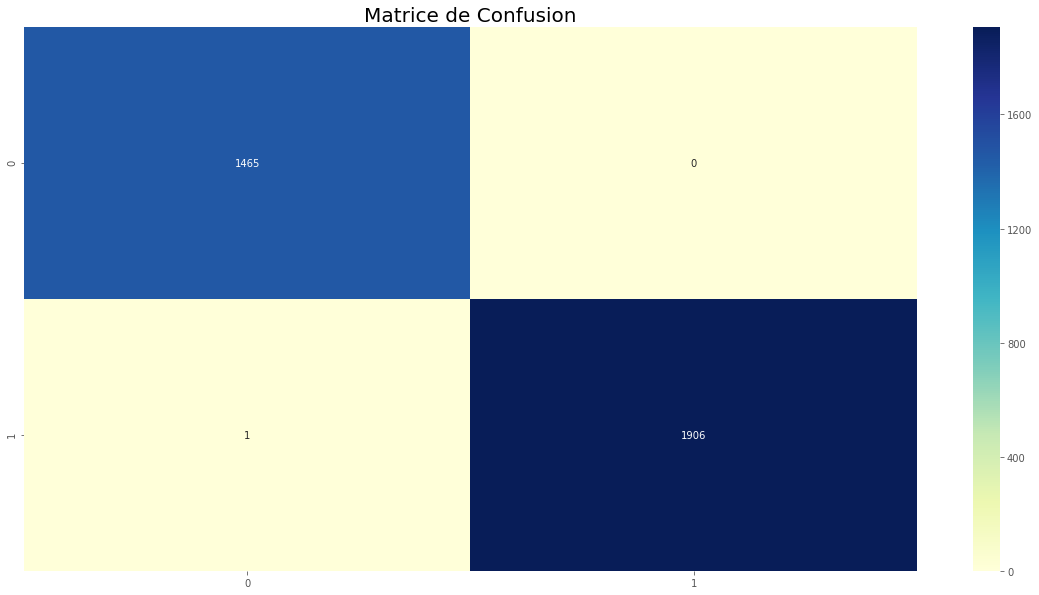

In [26]:
y_pred = cross_val_predict(LR, x, y, cv=k)
confusionmatrix=confusion_matrix(y,y_pred)
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion', fontsize = 20)
plt.show()

# Random Forest :

In [27]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
scoreRF = (cross_val_score(randomforest_classifier, x, y, cv=k, n_jobs=1, scoring=scoring))
scoreRF.round(1)

array([1., 1., 1., 1., 1.])

In [28]:
round(scoreRF.mean(),200)

1.0

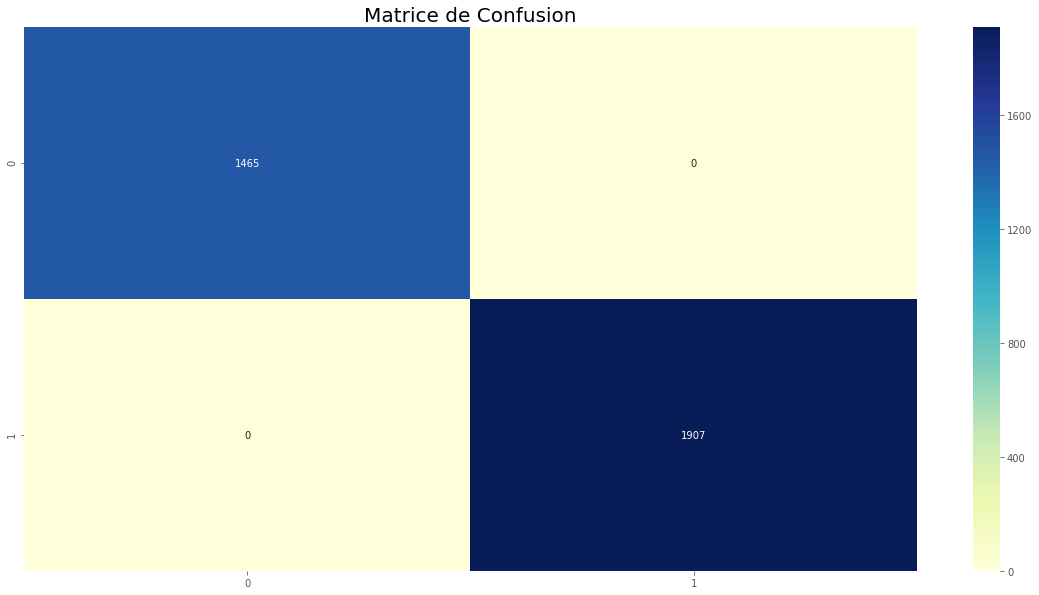

In [29]:
y_pred = cross_val_predict(randomforest_classifier, x, y, cv=k)
confusionmatrix=confusion_matrix(y,y_pred)
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion', fontsize = 20)
plt.show()

# Arbre de decision :

In [30]:
DecisionTree = DecisionTreeClassifier()
scoring = 'accuracy'
scoreDT = (cross_val_score(DecisionTree, x, y, cv=k, n_jobs=1, scoring=scoring))
scoreDT.round(1)

array([1., 1., 1., 1., 1.])

In [31]:
round(scoreDT.mean(),6)

1.0

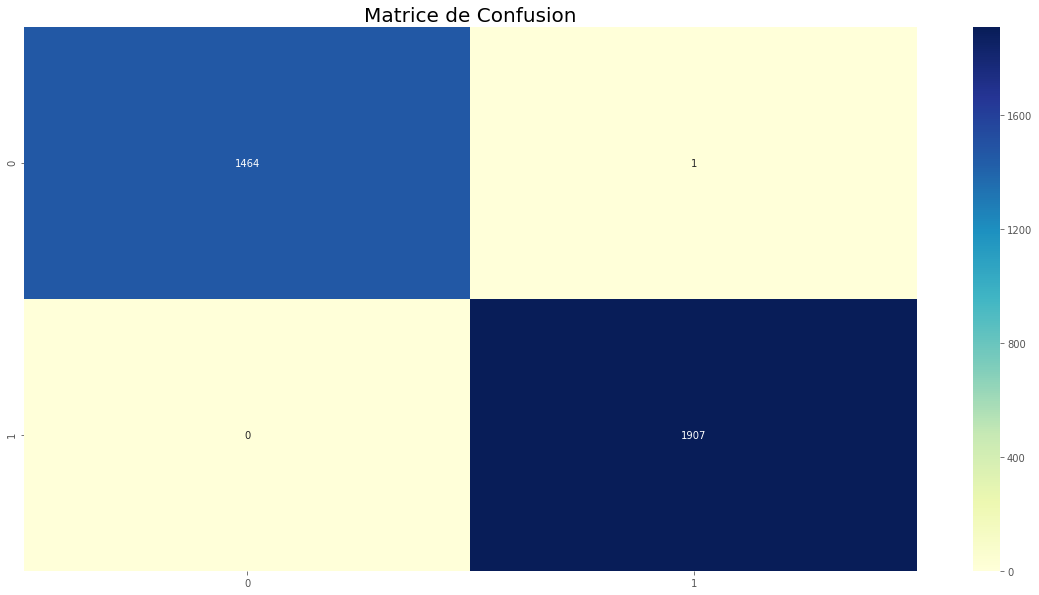

In [32]:
y_pred = cross_val_predict(DecisionTree, x, y, cv=k)
confusionmatrix=confusion_matrix(y,y_pred)
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Matrice de Confusion', fontsize = 20)
plt.show()

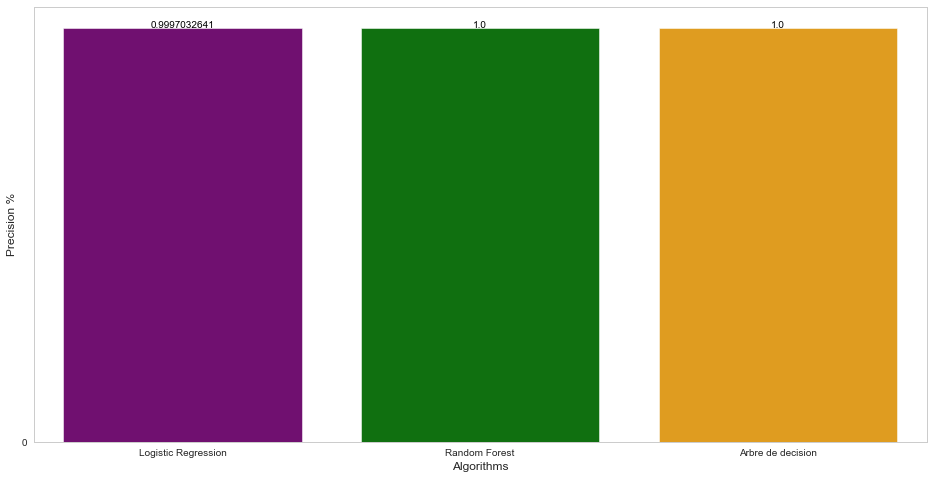

In [33]:
colors = ["purple", "green", "orange"]
X=['Logistic Regression','Random Forest','Arbre de decision']
Y=[round(scoreLR.mean(),10),round(scoreRF.mean(),10),round(scoreDT.mean(),10)]
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("P %")
g=sns.barplot(X, Y, palette=colors)
for i in range(len(Y)):
    g.text(i, Y[i],Y[i],color='black', ha="center")
plt.show()